In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account

import pandas as pd
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

credentials = service_account.Credentials.from_service_account_file('../credentials')
# Initialize the BigQuery client
client = bigquery.Client(credentials=credentials)

# About the dataset

The mushroom dataset is part of the UCI Machine Learning repository.
<br><br>
Despite the appeal of mushroom foraging, gatherers must be cautious, as mushrooms can be poisonous or even deadly.
<br><br>
This project aims to determine what characteristic features of mushrooms cause certain death and which are most edible. Note that all the data in this data set are hypothetical and based on 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom.
<br><br>
<b>Question:</b> Which features are most indicative of a poisonous mushroom?

# 🍄 About Mushrooms 🍄
Before I begin EDA on this data set, it is essential to know the anatomy of a mushroom.

![mushroom anatomy](mushroom_anatomy.jpg)

This datasets contains the following information about <b>caps:</b>
-  cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
-  cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
-  cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

This datasets contains the following information about the <b>gill:</b>
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

This datasets contains the following information about the <b>stalk:</b>
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

This datasets contains the following information about the <b>veil:</b>
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y

This datasets contains the following information about the <b>ring:</b>
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

Additional characteristics:
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

In [2]:
# query data
QUERY = ("""SELECT * FROM `portfoliodata-428314.kaggle.mushrooms`""")
query_job = client.query(QUERY)
mushrooms = query_job.result().to_dataframe()
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,y,e,False,m,f,c,b,w,...,y,c,c,p,w,n,n,w,c,d
1,p,k,y,c,False,m,a,c,b,w,...,y,c,c,p,w,n,n,w,c,d
2,p,k,y,n,False,m,f,c,b,w,...,y,c,c,p,w,n,n,w,c,d
3,p,f,y,e,False,m,a,c,b,w,...,y,c,c,p,w,n,n,w,c,d
4,p,k,y,e,False,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [3]:
# EDA

In [4]:
mushrooms_profile = ProfileReport(mushrooms, title="Report")
mushrooms_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

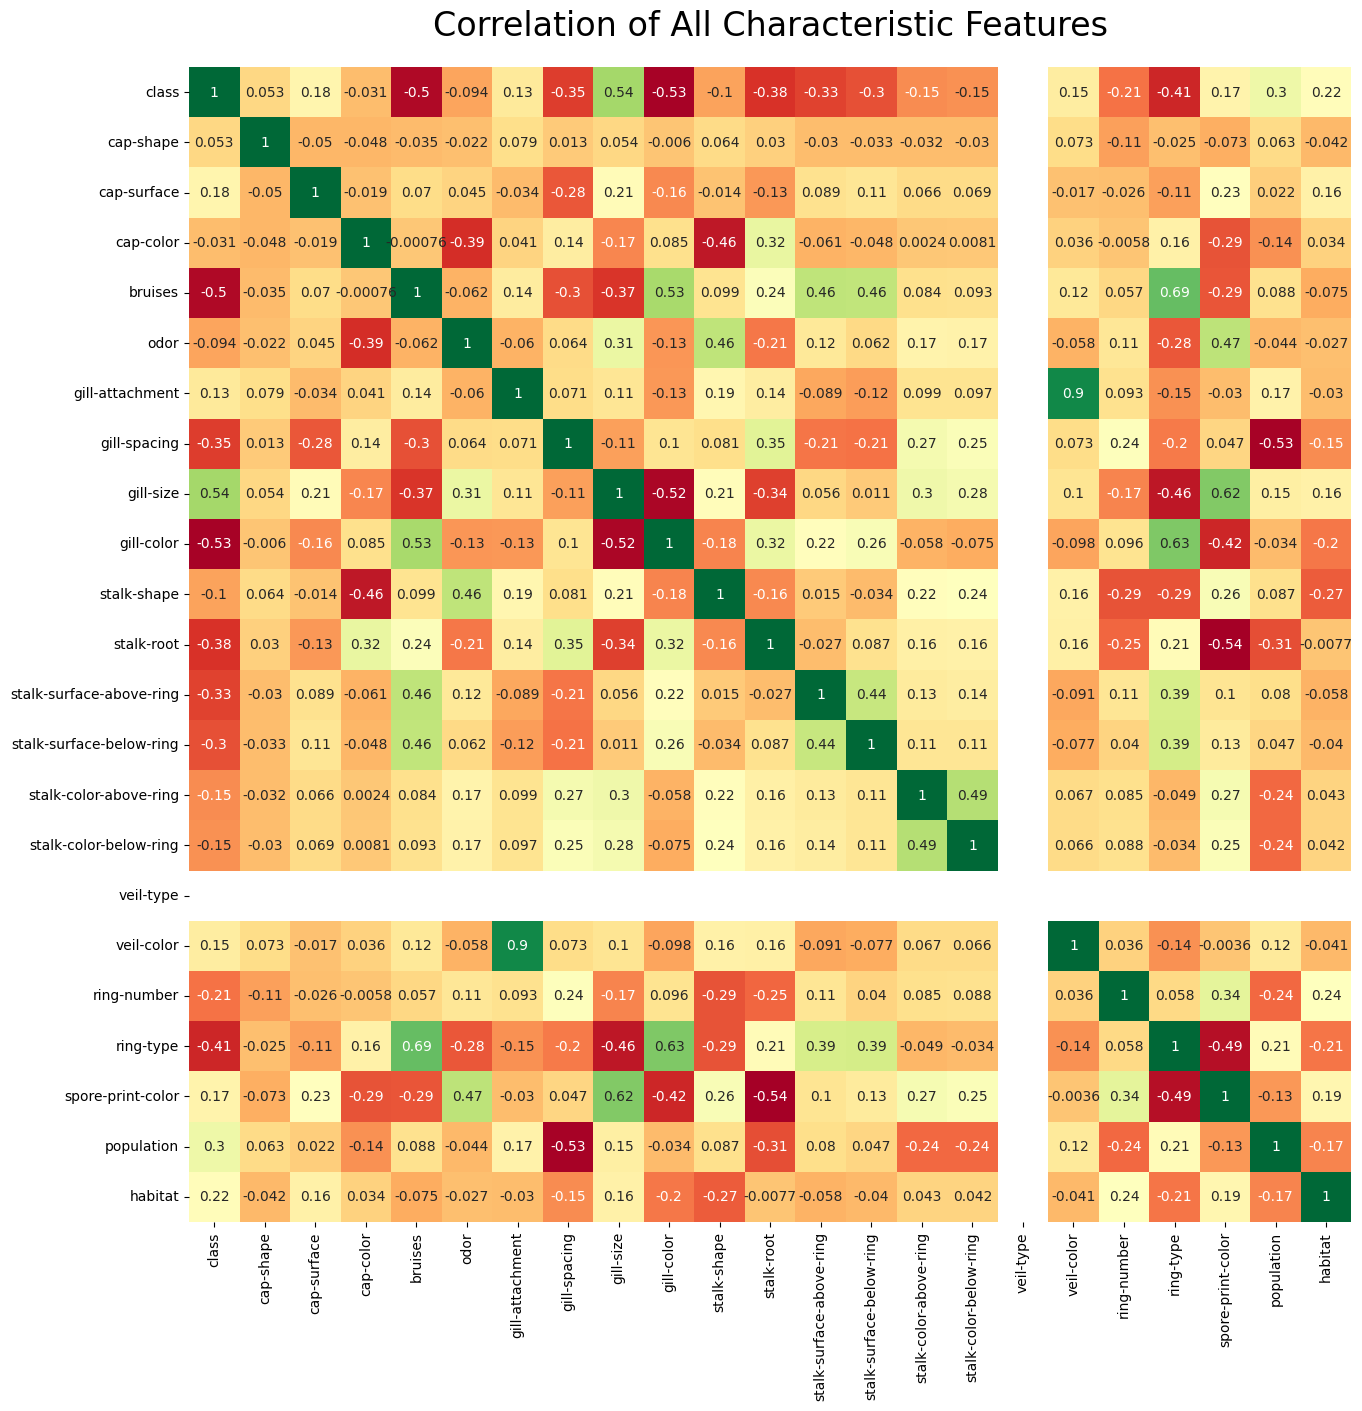

In [ ]:
mushrooms_encoded=mushrooms.copy()

#encode cat vars
for var in mushrooms_encoded.columns:
    mushrooms_encoded[var] = mushrooms_encoded[var].astype('category')
    mushrooms_encoded[var] = mushrooms_encoded[var].cat.codes

plt.figure(figsize=(15, 15))
corrMatrix=mushrooms_encoded.corr()

sns.heatmap(corrMatrix, annot=True,cmap='RdYlGn',cbar=False)
plt.title('Correlation of All Characteristic Features',fontsize=24,y=1.02)
plt.show()

In [ ]:
# all the mushrooms in this dataset have a partial veil. remove from dataset
mushrooms['veil-type'].value_counts()

veil-type
p    8124
Name: count, dtype: int64

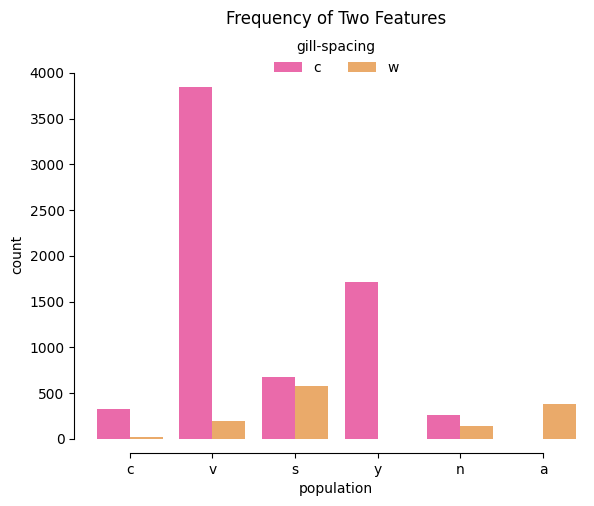

In [ ]:
ax=sns.countplot(data=mushrooms,x='population',hue='gill-spacing',palette='spring')
plt.title('Frequency of Two Features',y=1.1)
sns.despine(offset=10, trim=True)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, .95), ncol=5, frameon=False)
    